<a href="https://colab.research.google.com/github/hariharan-vs/24ADI003---24BAD030/blob/main/scenario_1_exp_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("carrie1/ecommerce-data")

# Construct the full path to the 'data.csv' file within the downloaded dataset
file_name = os.path.join(path, 'data.csv')

print("Path to 'data.csv' file:", file_name)

Using Colab cache for faster access to the 'ecommerce-data' dataset.
Path to 'data.csv' file: /kaggle/input/ecommerce-data/data.csv


Hariharan V S 24BAD030
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   --

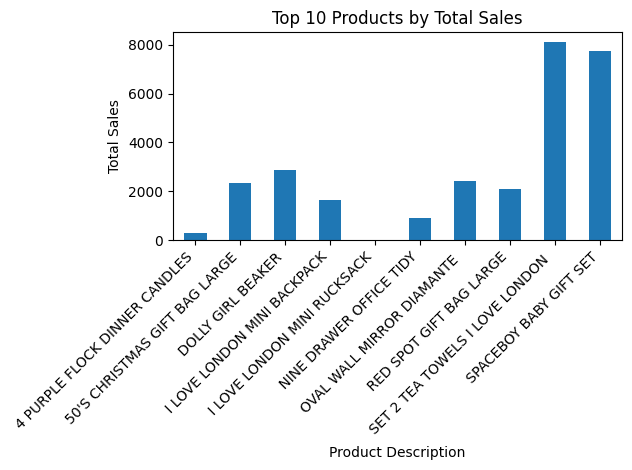

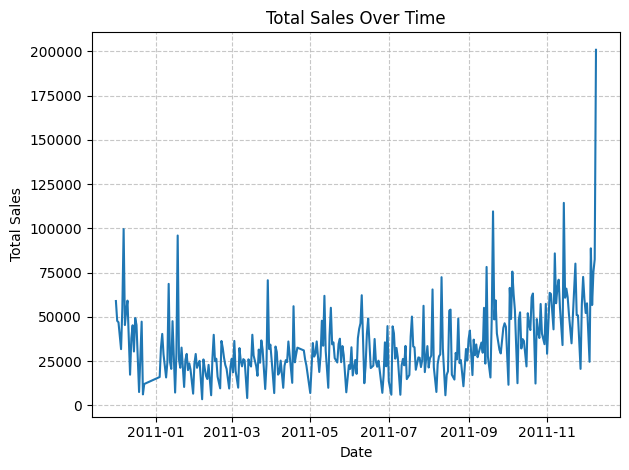

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

print("Hariharan V S 24BAD030")

# Read the uploaded CSV file
df = pd.read_csv(file_name, encoding="ISO-8859-1")

print(df.head())
print(df.info())
print(df.isnull().sum())

df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

top = df.groupby("Description")["TotalSales"].sum().head(10)
top.plot(kind="bar")
plt.title("Top 10 Products by Total Sales") # Add a title for clarity
plt.xlabel("Product Description") # Add x-axis label
plt.ylabel("Total Sales") # Add y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.groupby(df["InvoiceDate"].dt.date)["TotalSales"].sum().plot()
plt.title("Total Sales Over Time") # Add a title for clarity
plt.xlabel("Date") # Add x-axis label
plt.ylabel("Total Sales") # Add y-axis label
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()